In [1]:
import cv2
import json
import numpy as np
from typing import List, Tuple
from matplotlib import pyplot as plt

In [2]:
def show_image(img, title=""):
    if len(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))

    plt.axis('off')
    if title != "":
        plt.title(title)
    plt.show()

In [3]:
with open('../../dataset/storage/maskrcnn-dataset-augmented/via_project_test.json') as file:
    mask_data = json.load(file)

In [4]:
mask_data["_via_img_metadata"].keys()

dict_keys(['0.png3078222', '4.png3572881', '3.png3089687', '2.png3308830', '0-flip-0.png3078320', '0-rotate-0.png2837081', '0-rotate-1.png2837745', '0-blur-5.png2545924', '0-brightness-0.5.png2486032', '0-brightness-1.1.png3049185', '0-color_jitter.png2763127', '0-noise.png3261298', '4-flip-0.png3573061', '4-rotate-0.png3600531', '4-rotate-1.png3601255', '4-blur-5.png2919180', '4-brightness-0.5.png2847752', '4-brightness-1.1.png3620476', '4-color_jitter.png3191669', '4-noise.png3820523', '3-flip-0.png3089707', '3-rotate-0.png3000856', '3-rotate-1.png3001354', '3-blur-5.png2532862', '3-brightness-0.5.png2478303', '3-brightness-1.1.png3130619', '3-color_jitter.png2807718', '3-noise.png3296920', '2-flip-0.png3308760', '2-rotate-0.png3189589', '2-rotate-1.png3191223', '2-blur-5.png2797880', '2-brightness-0.5.png2622030', '2-brightness-1.1.png3327935', '2-color_jitter.png2686845', '2-noise.png3550743'])

In [6]:
polygons = {}

for index, region in enumerate(mask_data["_via_img_metadata"]["0-flip-0.png3078320"]["regions"]):
    all_points_x = mask_data["_via_img_metadata"]["0-flip-0.png3078320"]["regions"][region]["shape_attributes"]["all_points_x"]
    all_points_y = mask_data["_via_img_metadata"]["0-flip-0.png3078320"]["regions"][region]["shape_attributes"]["all_points_y"]

    coordinates = list(zip(all_points_x, all_points_y))
    polygons[index] = coordinates


In [7]:
image = cv2.imread("../../dataset/storage/maskrcnn-dataset-augmented/0-flip-0.png")

In [8]:
def overlay_mask(image, polygon, color=(0, 255, 0), alpha=0.5):
    # Create a blank image for the mask
    mask = np.zeros_like(image)


    points = np.array(polygon, dtype=np.int32)
    points = points.reshape((-1, 1, 2))
    cv2.fillPoly(mask, [points], color)

    # Overlay the mask on the original image
    result = cv2.addWeighted(image, 1, mask, alpha, 0)

    return result

In [9]:
image1 = image.copy()
for polygon in polygons.values():
    color = np.random.randint(0,255,3).tolist()  
    
    image1 = overlay_mask(image1, polygon, color=color, alpha=0.5)

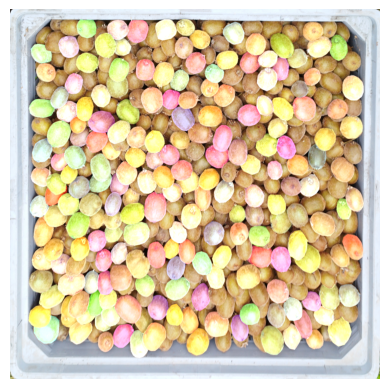

In [10]:
show_image(image1)

In [11]:
# cv2.imwrite("prova.png", image)

In [44]:
# https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#gaf259efaad93098103d6c27b9e4900ffa

for index, polygon in enumerate(polygons.values()):
    image2 = image.copy()
    
    # Convert polygon coordinates to int32
    polygon = np.array(polygon, dtype=np.int32)

    cv2.polylines(image2, [polygon], isClosed=True, color=(255, 255, 255), thickness=1)

    # Fit an ellipse to the approximated polygon
    ellipse = cv2.fitEllipse(polygon)
    ellipseAMS = cv2.fitEllipseAMS(polygon)
    ellipseDirect = cv2.fitEllipseDirect(polygon)

    # Draw the fitted ellipse on the image
    cv2.ellipse(image2, ellipse, (0, 255, 255), 1)
    cv2.ellipse(image2, ellipseAMS, (255, 0, 255), 1)
    cv2.ellipse(image2, ellipseDirect, (255, 255, 0), 1)

    # Get the bounding box of the fitted ellipse
    (x, y, w, h) = cv2.boundingRect(polygon)

    # Crop the image to the bounding box
    cropped_image = image2[y-5:y+h+5, x-5:x+w+5]
    resized = cv2.resize(cropped_image, (1500, 1500), interpolation=cv2.INTER_LINEAR)

    cv2.imwrite(f"ellipses/{index}-ellipse.jpg", resized)


KeyboardInterrupt: 